In [14]:
import pickle as pkl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import utils
import models
import GraphKernel

In [15]:
from imblearn.ensemble import BalancedBaggingClassifier

In [16]:
path = 'data/'
with open(path + 'training_data.pkl', 'rb') as file: 
    train_graphs = pkl.load(file) 

with open(path + 'test_data.pkl', 'rb') as file: 
    test_graphs = pkl.load(file) 
    
with open(path + 'training_labels.pkl', 'rb') as file: 
    train_labels = pkl.load(file) 

In [17]:
for G in train_graphs:
    for e in G.edges:
        G.edges[e]['labels'] = G.edges[e]['labels'][0] + 1

for G in test_graphs:
    for e in G.edges:
        G.edges[e]['labels'] = G.edges[e]['labels'][0] + 1

In [18]:
one_train = []
zero_train = []
for (i,G) in enumerate(train_graphs):
    if(train_labels[i] == 0):
        zero_train.append(G)
    else:
        one_train.append(G)    

In [19]:
n = 2000
train_graphs = one_train
train_labels = [1]*len(one_train)
for G in zero_train:
    if(len(train_graphs) == n):
        break
    train_graphs.append(G)
    train_labels.append(0)


In [20]:
zero_train = zero_train[n:]
y_zeros = np.zeros(len(zero_train))

In [21]:
len(zero_train)

3445

In [22]:
C = 0.1

In [23]:
randomWalk = GraphKernel.KShortestPath(maxK = 2)
K_train = randomWalk.compute_kernel(train_graphs,train_graphs)

100%|██████████| 2000/2000 [01:28<00:00, 22.71it/s]


In [24]:
K_train

array([[45972., 15201., 27856., ...,  6503.,  9662.,  8353.],
       [15201., 11296., 21360., ...,  2047.,  6473.,  4164.],
       [27856., 21360., 61362., ...,  3558., 13908.,  7322.],
       ...,
       [ 6503.,  2047.,  3558., ...,  5140.,  1228.,  1258.],
       [ 9662.,  6473., 13908., ...,  1228.,  6523.,  2702.],
       [ 8353.,  4164.,  7322., ...,  1258.,  2702.,  3092.]])

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle =True)
score = cross_val_score(SVC(C = C, kernel='precomputed',  probability=True, class_weight='balanced'), K_train, train_labels, cv=skf, scoring = 'roc_auc')
print(score)
print(np.mean(score))

[0.83897565 0.84728327 0.86737429 0.89154899 0.87113065]
0.8632625705290066


In [26]:
K_zero = randomWalk.compute_kernel(zero_train,train_graphs)

 60%|██████    | 2075/3445 [00:51<00:33, 40.39it/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "C:\Users\aliha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\aliha\AppData\Local\Temp\ipykernel_13340\1391177296.py", line 1, in <module>
    K_zero = randomWalk.compute_kernel(zero_train,train_graphs)
  File "c:\Users\aliha\OneDrive\Desktop\MVA\P2-Kernel Methods\project\GraphKernel.py", line 167, in compute_kernel
    k = self.shortest_kernel(freq_list_a[i],freq_list_b[j])
  File "c:\Users\aliha\OneDrive\Desktop\MVA\P2-Kernel Methods\project\GraphKernel.py", line -1, in shortest_kernel
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\aliha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\s

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(C = C, kernel='precomputed',  probability=True)

# Fit on the train Kernel
clf.fit(K_train, train_labels)

# Predict and test.
y_pred = clf.predict(K_zero)

print("Classification accuracy: %0.2f" % accuracy_score(y_zeros, y_pred))

Classification accuracy: 0.85


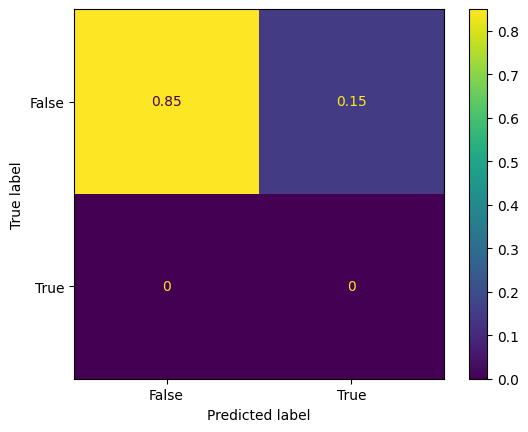

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = clf.predict(K_zero)
#tn, fp, fn, tp = confusion_matrix(y_train, y_pred,normalize='true').ravel()
confusion_matrix = confusion_matrix(y_zeros, y_pred,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\aliha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\aliha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


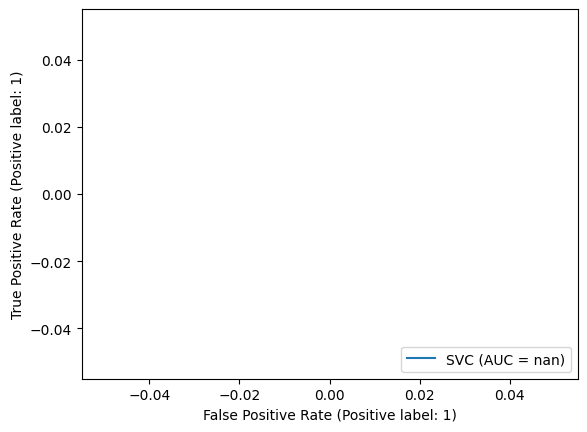

In [ ]:
from sklearn.metrics import plot_roc_curve, auc 
plot_roc_curve(clf, K_zero, y_zeros)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_graphs, train_labels, test_size=0.3, random_state=100,stratify=train_labels)

In [ ]:
K_train = randomWalk.compute_kernel(X_train,X_train)
K_train

100%|██████████| 1400/1400 [00:49<00:00, 28.50it/s]


array([[   917.,   2302.,    650., ...,   1771.,   1615.,   9591.],
       [  2302.,   9025.,   1906., ...,   5603.,   4309.,  33431.],
       [   650.,   1906.,   1354., ...,   2017.,   1312.,  11227.],
       ...,
       [  1771.,   5603.,   2017., ...,   5920.,   3872.,  27361.],
       [  1615.,   4309.,   1312., ...,   3872.,   4668.,  25320.],
       [  9591.,  33431.,  11227., ...,  27361.,  25320., 213781.]])

In [ ]:
K_test = randomWalk.compute_kernel(X_test,X_train)
K_test

100%|██████████| 600/600 [00:20<00:00, 29.11it/s]


array([[  2543.,   8593.,   2474., ...,   6600.,   5978.,  39960.],
       [  1514.,   4304.,   1336., ...,   3574.,   4334.,  28038.],
       [  1519.,   4087.,   1048., ...,   3577.,   3646.,  20620.],
       ...,
       [  1075.,   3786.,   1153., ...,   3074.,   2489.,  18014.],
       [   688.,   1831.,    386., ...,   1417.,   1353.,   6879.],
       [  2440.,   8031.,   4262., ...,   3799.,   9461., 101095.]])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(C = C, kernel='precomputed',  probability=True,class_weight='balanced')

# Fit on the train Kernel
clf.fit(K_train, y_train)

# Predict and test.
y_pred = clf.predict(K_test)

print("Classification accuracy: %0.2f" % accuracy_score(y_test, y_pred))

Classification accuracy: 0.81


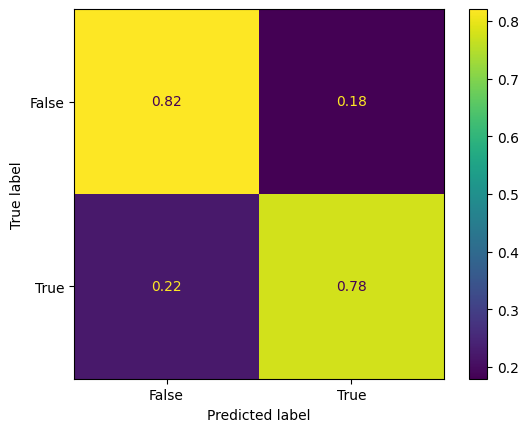

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = clf.predict(K_test)
#tn, fp, fn, tp = confusion_matrix(y_train, y_pred,normalize='true').ravel()
confusion_matrix = confusion_matrix(y_test, y_pred,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\aliha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


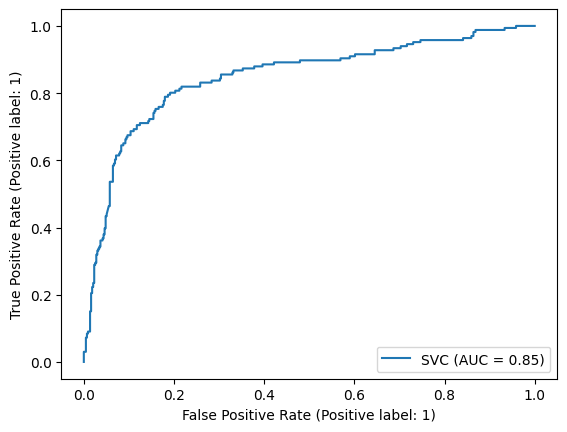

In [ ]:
from sklearn.metrics import plot_roc_curve, auc 
plot_roc_curve(clf, K_test, y_test)

In [ ]:
K_train = randomWalk.compute_kernel(train_graphs,train_graphs)
K_train

  5%|▍         | 96/2000 [00:05<01:53, 16.73it/s]


KeyboardInterrupt: 

In [ ]:
K_test = randomWalk.compute_kernel(test_graphs,train_graphs)

100%|██████████| 2000/2000 [00:39<00:00, 50.89it/s]


In [ ]:
y_train = train_labels
y_train = np.array(y_train).reshape(-1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(C = C, kernel='precomputed',  probability=True,class_weight='balanced')

# Fit on the train Kernel
clf.fit(K_train, y_train)

# Predict and test.
y_pred = clf.predict(K_train)

print("Classification accuracy: %0.2f" % accuracy_score(y_train, y_pred))

Classification accuracy: 0.83


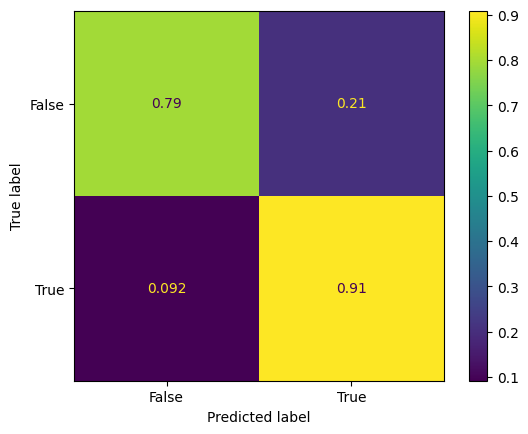

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred = clf.predict(K_train)
#tn, fp, fn, tp = confusion_matrix(y_train, y_pred,normalize='true').ravel()
confusion_matrix = confusion_matrix(y_train, y_pred,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

C:\Users\aliha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


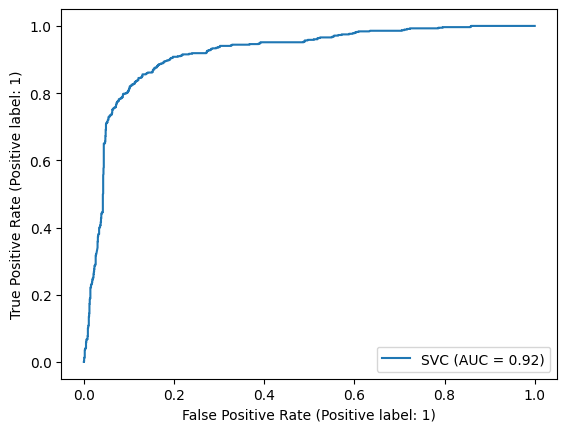

In [ ]:
from sklearn.metrics import plot_roc_curve, auc 
plot_roc_curve(clf, K_train, y_train)

In [ ]:
y_pred = clf.predict_proba(K_test)[:,1]
y_pred = np.log(y_pred/(1-y_pred))
y_pred

array([-1.92508405, -1.32963168, -3.81550789, ..., -1.6932655 ,
       -0.11486014, -2.18870798])

In [ ]:
sub = pd.DataFrame()
sub['Id']= np.arange(1,len(y_pred)+1)
sub['Predicted'] = y_pred
sub.to_csv("submissions/sub.csv",index=False)